In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Load the dataset
file_path = r'C:\Users\Mihir Patel\Downloads\bank+marketing\bank\bank-full.csv'
bank_data = pd.read_csv(file_path, sep=';')


In [12]:
bank_data.shape

(45211, 17)

In [13]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
print("\nTarget Variable Distribution:")
print(bank_data['y'].value_counts())


Target Variable Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_8608\4173835318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=bank_data, palette='Set2')


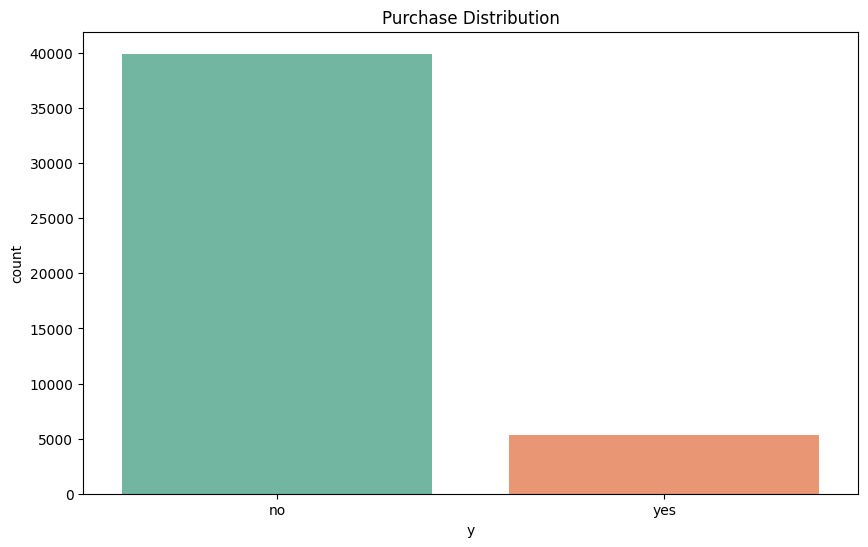

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=bank_data, palette='Set2')
plt.title('Purchase Distribution')
plt.show()


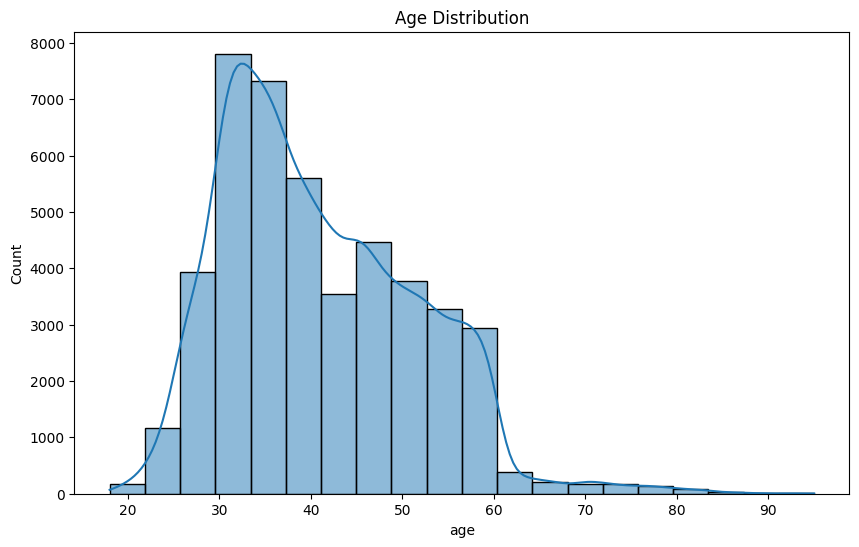

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()


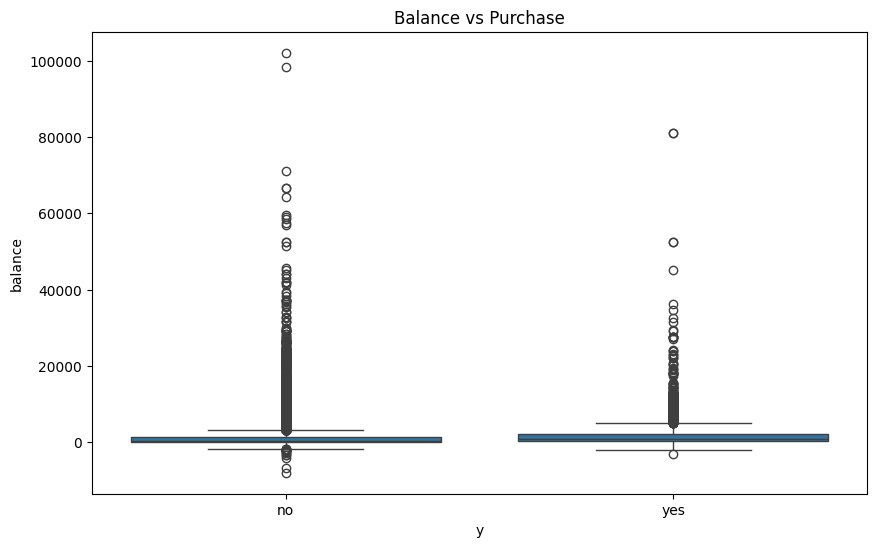

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=bank_data)
plt.title('Balance vs Purchase')
plt.show()


In [23]:
# Step 1: Preprocessing the data
label_encoders = {}
for column in bank_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    bank_data[column] = le.fit_transform(bank_data[column])
    label_encoders[column] = le  # Save the encoder for future reference



In [24]:
# Step 2: Splitting the dataset into features and target variable
X = bank_data.drop(columns=['y'])  # Features
y = bank_data['y']  # Target


In [25]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Building the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [27]:
# Step 5: Making predictions and evaluating the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [30]:
print(f"Accuracy: {accuracy*100}")
print("Classification Report:")
print(report)

Accuracy: 87.40462235983634
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



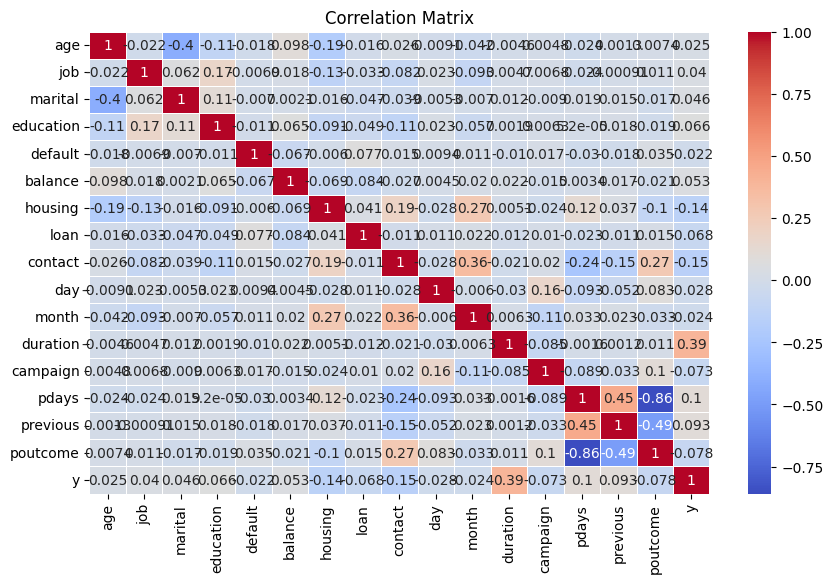

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(bank_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()